In [1]:
#%matplotlib inline is run so that the plot will show underneath the code chunk automatically when it is executed.
#Otherwise the user will need to type plt.show() everytime a new plot is created.
#This functionality is exclusive to Jupyter Notebook/IPython.
%matplotlib inline 
import numpy as np
import pandas as pd
# Matplotlib's highly customizable code structure makes it a great guide to other plotting libraries.
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [15, 10] allows to control the size of the entire plot. 
#This corresponds to a 15∗10 (length∗width) plot.
plt.rcParams['figure.figsize'] = (20.0,10.0)


In [2]:
#reading dataset of headbrain
data = pd.read_csv('E:\headbrain dataset/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
#collecting the data values to do stats of headsize and brain weight
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [4]:
#mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total no of values
n = len(X)

#as the values are collected now we will calcualte slope of using formula
# calculate b1 and b2 here b1 is slope and b2 is constant
#slope formula is sum{(x-mean_x)(y-mean_y)}/{sum(x-mean_x)^2}
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) **2
#b1 is m
b1 = numer/denom
#b2 is c  in y = mx + c
b0 = mean_y - (b1*mean_x)

#print coefficients
print(b1,b0)



0.26342933948939945 325.57342104944223


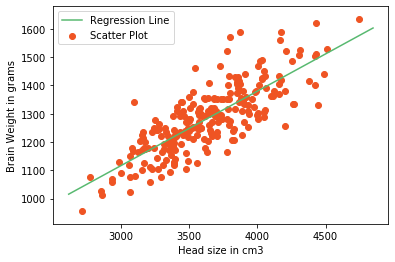

In [6]:
#plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating lline values x and y
x = np.linspace(min_x, max_x, 1000)
y = b1 * x + b0

#plotting line
plt.plot(x, y, color = '#58b970', label = 'Regression Line')
#plotting scatter point
plt.scatter(X, Y, c='#ef5423', label = 'Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()


In [7]:
#finding how good is our model
"""
methods 
    1.Root mean square method
    2.Coefficient or determination
    3.R square method(list square method)
"""

ss_t =0
ss_r =0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 -(ss_r/ss_t)
print(r2)

0.6393117199570003


In [ ]:
#now all this calculation can be done using scikit liabrary

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use Rank 1 matrix in scikit learn

X = X.reshape((n,1))
#creating Model
reg_model = LinearRegression()
reg_model.fit(X,)
#Y Prediction
Y_pred = reg_model.predict(X)
# calculating r2 Score
r2_score = reg_model.score(X,Y)

print(r2_score)

ValueError: Found input variables with inconsistent numbers of samples: [237, 1000]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklear.model_selection import train_test_split

train_test_split